In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
input_size = 784 # 28x28
hidden_size_1 = 500 
hidden_size_2 =250
hidden_size_3 = 100
num_classes = 10
num_epochs = 15
batch_size = 64
learning_rate = 0.01

In [ ]:
# Import MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [ ]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1,hidden_size_2,hidden_size_3, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size_1) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size_1, hidden_size_2)

        self.l3 = nn.Linear(hidden_size_2, hidden_size_3)
        
        self.l4 = nn.Linear(hidden_size_3, num_classes)
        self.softmax = nn.LogSoftmax(dim = 1) 
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        out = self.relu(out)
        out = self.l4(out)
        out = self.softmax(out)
        
        return out


model = NeuralNet(input_size, hidden_size_1,hidden_size_2,hidden_size_3, num_classes).to(device)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001, betas=(0.9, 0.999), eps=1e-08 )

In [ ]:
# Train the model
loss_log = []
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if (i+1) % 200 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            loss_log.append(loss.item())

Epoch [1/15], Step [200/938], Loss: 0.1122
Epoch [1/15], Step [400/938], Loss: 0.1275
Epoch [1/15], Step [600/938], Loss: 0.1615
Epoch [1/15], Step [800/938], Loss: 0.0877
Epoch [2/15], Step [200/938], Loss: 0.1037
Epoch [2/15], Step [400/938], Loss: 0.0235
Epoch [2/15], Step [600/938], Loss: 0.1799
Epoch [2/15], Step [800/938], Loss: 0.0157
Epoch [3/15], Step [200/938], Loss: 0.0343
Epoch [3/15], Step [400/938], Loss: 0.2063
Epoch [3/15], Step [600/938], Loss: 0.0323
Epoch [3/15], Step [800/938], Loss: 0.0758
Epoch [4/15], Step [200/938], Loss: 0.0595
Epoch [4/15], Step [400/938], Loss: 0.0850
Epoch [4/15], Step [600/938], Loss: 0.0460
Epoch [4/15], Step [800/938], Loss: 0.0519
Epoch [5/15], Step [200/938], Loss: 0.0450
Epoch [5/15], Step [400/938], Loss: 0.0075
Epoch [5/15], Step [600/938], Loss: 0.0041
Epoch [5/15], Step [800/938], Loss: 0.1118
Epoch [6/15], Step [200/938], Loss: 0.0462
Epoch [6/15], Step [400/938], Loss: 0.0086
Epoch [6/15], Step [600/938], Loss: 0.0108
Epoch [6/15

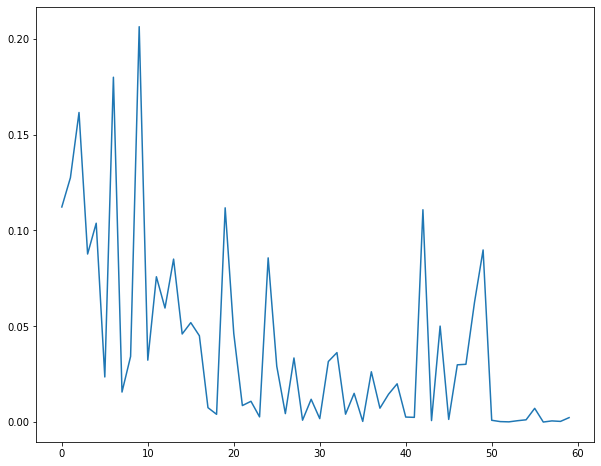

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(loss_log)

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 98.13 %


*Inference: This model using ADAM optimiser instead of gradient descent outperforms all unregularised and the regularised relu activation model. This shows that ADAM optimiser is better than Gradient descent for learning parameters.*

In [ ]:
!pip install nbconvert
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to html "MNIST_PyTorch_Relu.ipynb"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa
Sugges